In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys
os.environ['DEBUG'] = '1'  # a slightly verbose debugging setting

In [3]:
import jax
from housemaze import env
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from pprint import pprint

from IPython.display import display, Markdown
from nicewebrl import stages as nice_stages

import matplotlib.pyplot as plt
import experiment_1 as experiment


No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
params.task_probs=[0.5 0.  0.5 0.  0.  0. ]
Compiling jax environment functions.
params.task_probs=[0.5 0.  0.5 0.  0.  0. ]
	time: 1.0902349948883057
Compiling multi-render function.
params.task_probs=[0.5 0.  0.5 0.  0.  0. ]
	time: 0.06168699264526367


In [4]:
from housemaze.env import KeyboardActions
from experiment_utils import SuccessTrackingAutoResetWrapper
from housemaze.human_dyna import multitask_env
from load_data import get_task_object, object_idx_to_name

jax_env = experiment.jax_env
reset = jax_env.reset
step = jax_env.step


In [11]:
rng = jax.random.PRNGKey(41)
params = experiment.make_params(mazes.maze0, experiment.groups, experiment.char2idx, True)
timestep = reset(rng, params)

params.task_probs=[0.  0.5 0.  0.  0.  0.5]


In [12]:
params.training

False

params.task_probs=[0.  0.5 0.  0.5 0.  0. ]
13 potato


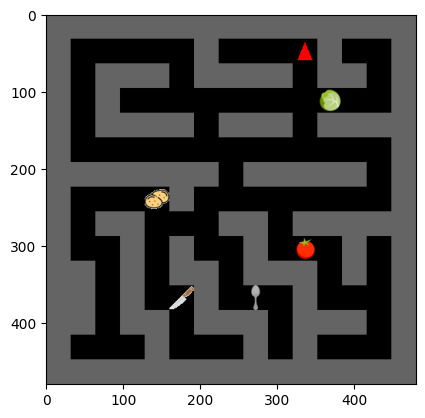

params.task_probs=[0.  0.5 0.  0.5 0.  0. ]
13 potato


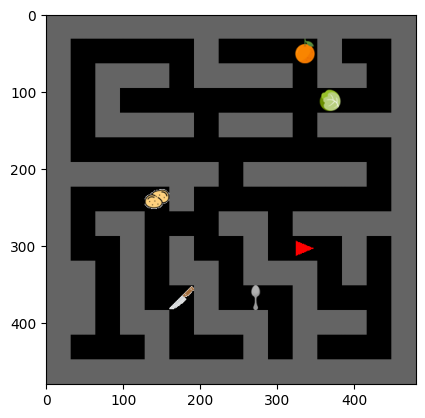

In [14]:
from housemaze.env import KeyboardActions
from experiment_utils import SuccessTrackingAutoResetWrapper
from housemaze.human_dyna import multitask_env
from load_data import get_task_object, object_idx_to_name

jax_env = experiment.jax_env
reset = jax_env.reset
step = jax_env.step


rng = jax.random.PRNGKey(41)
params = experiment.make_params(mazes.maze0, experiment.groups, experiment.char2idx, True).replace(
    training=False,
)
timestep = reset(rng, params)

object_idx = timestep.state.task_object
object_name = object_idx_to_name(object_idx)
print(object_idx, object_name)

# image = experiment.render_fn(timestep)
# plt.imshow(image)
# plt.show()


success_actions = [
    KeyboardActions.up,
    KeyboardActions.right, KeyboardActions.right, KeyboardActions.right,
    KeyboardActions.up, KeyboardActions.up, KeyboardActions.up, KeyboardActions.up
]
for action in success_actions:
    rng, rng_ = jax.random.split(rng)
    timestep = step(rng_, timestep, action, params)

# print final
image = experiment.render_fn(timestep)
plt.imshow(image)
plt.show()

# next episode?
timestep = step(rng, timestep, KeyboardActions.up, params)
object_idx = timestep.state.task_object
object_name = object_idx_to_name(object_idx)
print(object_idx, object_name)

success_actions = [
    KeyboardActions.down,
    KeyboardActions.right, KeyboardActions.right,
    KeyboardActions.down, KeyboardActions.down,
    KeyboardActions.right,
]
for action in success_actions:
    rng, rng_ = jax.random.split(rng)
    timestep = step(rng_, timestep, action, params)

image = experiment.render_fn(timestep)
plt.imshow(image)
plt.show()


In [27]:
timestep.step_type

Array(3, dtype=uint8)

remaining=[0 0 0 0 1 0]


Array(3, dtype=uint8)

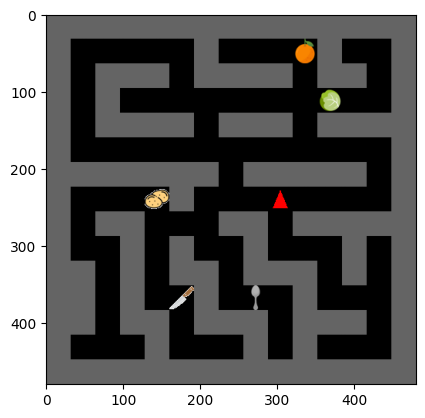

In [34]:
timestep = step(rng, timestep, KeyboardActions.up, params)

image = experiment.render_fn(timestep)
plt.imshow(image)
timestep.step_type

reset.task_probs=[0.5 0.  0.  0.  0.5 0. ]
params.task_probs=[0.5 0.  0.  0.  0.5 0. ]


Array(0, dtype=uint8)

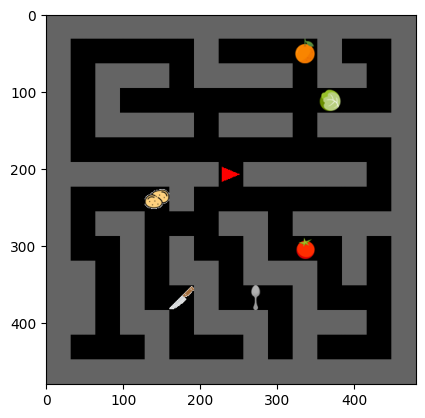

In [35]:
timestep = reset(rng, params)

image = experiment.render_fn(timestep)
plt.imshow(image)
timestep.step_type

orange


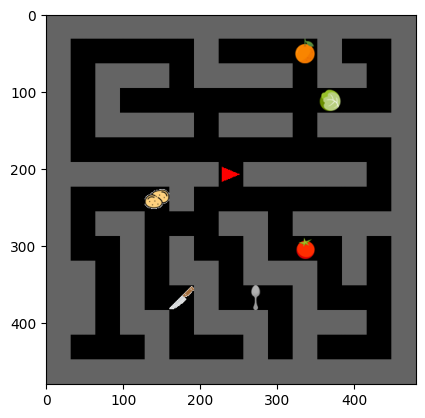

In [15]:


rng = jax.random.PRNGKey(42)
params = experiment.make_params(mazes.maze0, experiment.groups, experiment.char2idx, True)
timestep = reset(rng, params)
image = experiment.render_fn(timestep)

object_idx = timestep.state.task_object
object_name = object_idx_to_name(object_idx)
print(object_name)
plt.imshow(image)


In [16]:
task_runner = experiment.task_runner
task_state = task_runner.reset(timestep.state.grid, timestep.state.agent_pos)
task_success_count = jnp.zeros_like(task_state.features)


task_runner.task_objects, task_success_count

(array([29, 13, 43,  3, 27, 46], dtype=int32),
 Array([0, 0, 0, 0, 0, 0], dtype=int32))

In [18]:
def task_object_mask(objects, possible_task_objects):
    isin = jax.vmap(lambda a, b: a == b, in_axes=(0, None))(
        objects, possible_task_objects)
    isin = isin.sum(0)
    return isin


isin = jax.vmap(task_object_mask, (0, None))(
    params.reset_params.train_objects, task_runner.task_objects)
isin, isin.shape

(Array([[1, 0, 1, 0, 0, 0]], dtype=int32), (1, 6))

In [19]:
params.reset_params.train_objects, task_runner.task_objects

(Array([[29, 43]], dtype=int32), array([29, 13, 43,  3, 27, 46], dtype=int32))

--------
--------


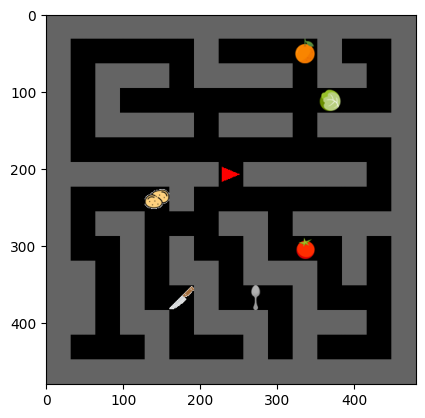

In [12]:
timestep.state.successes

Array([2, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
import experiment_utils

experiment_utils.successes

[]

In [44]:
task_runnner.task_objects

NameError: name 'task_runnner' is not defined

In [38]:
import jax
import jax.numpy as jnp
import numpy as np

# Global list to be updated
global_list = []

def update_global_list(x):
    # This function will be called by pure_callback
    # It returns the updated list, rather than modifying the global directly
    global_list.append(x)
    return len(global_list)

def f(x):
    # Define the shape and dtype of the result (which will be the updated list)
    # result_shape = jax.ShapeDtypeStruct((len(global_list) + 1,), x.dtype)
    
    # Use pure_callback to call the update function
    y = jax.experimental.io_callback(update_global_list, x,x)
    
    # Return the last element (the newly added one)
    return y+x

# JIT-compile the function
jitted_f = jax.jit(f)

# Use the function and update the global list
for i in range(5):
    j = jitted_f(jnp.array(i, dtype=int))
    print('---------')
    print(i, j)
    print(global_list)
    
    # Update the global list outside of the JAX computation
    # global_list = list(result.astype(int))  # Convert to regular Python list
    
    # print(f"Added {i} to the list. Current global_list: {global_list}")
global_list

---------
0 1
[Array(0, dtype=int32)]
---------
1 3
[Array(0, dtype=int32), Array(1, dtype=int32)]
---------
2 5
[Array(0, dtype=int32), Array(1, dtype=int32), Array(2, dtype=int32)]
---------
3 7
[Array(0, dtype=int32), Array(1, dtype=int32), Array(2, dtype=int32), Array(3, dtype=int32)]
---------
4 9
[Array(0, dtype=int32), Array(1, dtype=int32), Array(2, dtype=int32), Array(3, dtype=int32), Array(4, dtype=int32)]


[Array(0, dtype=int32),
 Array(1, dtype=int32),
 Array(2, dtype=int32),
 Array(3, dtype=int32),
 Array(4, dtype=int32)]

# Note that below I've turned off randomization via DEBUG=2 to make it easier to analyze

# Manipulation 1:

## shortcut

 A shortcut is introduced

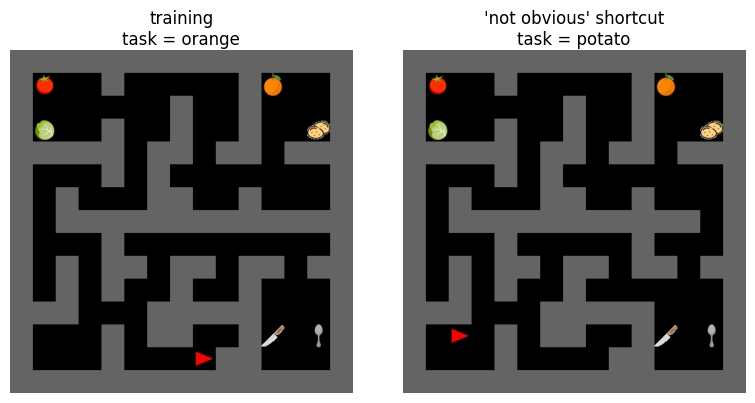

# Manipulation 2:

## faster when on-path but further than off-path but closer

 
        In both tests, a shortcut is introduced. In the first, the agent is tested on the same path it trained on. In the second, the agent is tested on a different path.
        

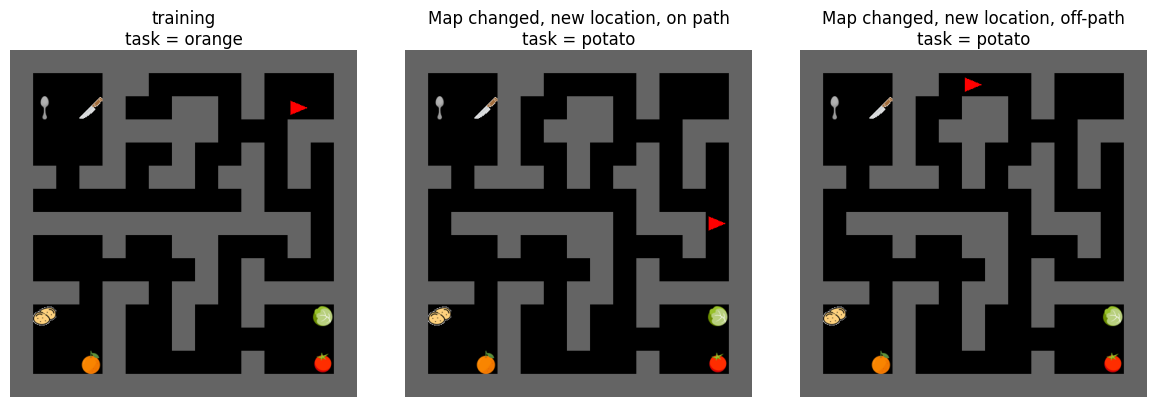

# Manipulation 3:

## reusing longer of two paths which matches training path

 
        Here there are two paths to the test object. We predict that people will take the path that was used to get to the training object.
        

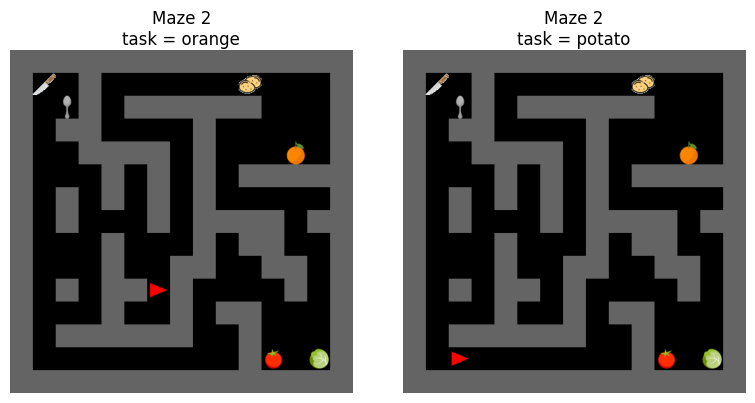

# Manipulation 4:

## probing for planning near goal

 
            At test time, we'll change the location of the off-task object so it's equidistant from path during training.
            We'll first query when the off-task object is in the same location as during training. We'll then query again with it being in a different locaiton.
            

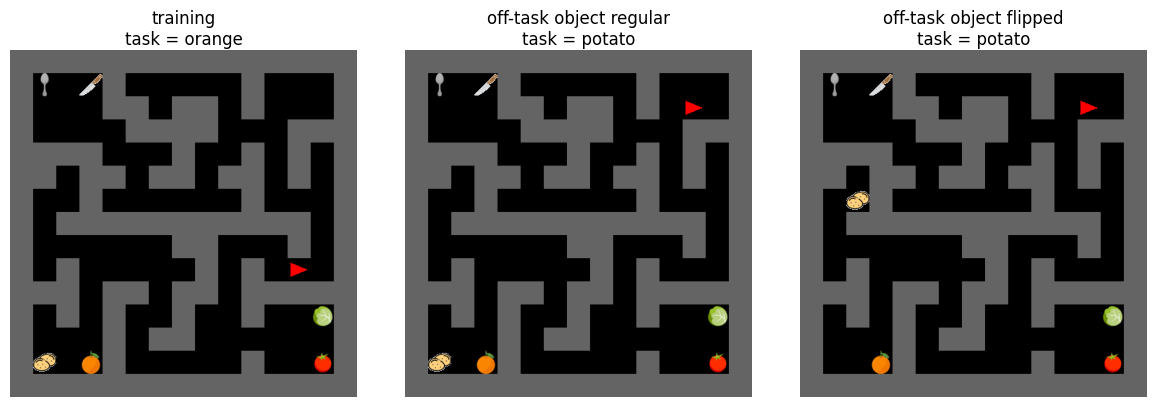

In [9]:
image_keys = experiment.image_keys
manipulation_group = experiment.groups[0]
train_object = manipulation_group[0]
test_object = manipulation_group[1]

def create_env_stage_figure(env_stages, rng):
    num_stages = len(env_stages)
    
    
    if num_stages == 1:
        axes = [axes]  # Make axes iterable if there's only one subplot
    
    
    for ax, stage in zip(axes, env_stages):
        timestep = stage.web_env.reset(rng, stage.env_params)
        image = experiment.render_fn(timestep)
        
        ax.imshow(image)
        ax.axis('off')
        title = stage.metadata.get('desc', '') or stage.name
        if stage.metadata['eval']:
            category = image_keys[test_object]
        else:
            category = image_keys[train_object]
        title += f'\ntask = {category}'

        ax.set_title(title, wrap=True)
    
    plt.tight_layout()
    return fig

rng = jax.random.PRNGKey(42)
for block in experiment.all_blocks:
    display(Markdown(f"# Manipulation {block.metadata['manipulation']}:"))
    display(Markdown(f"## {block.metadata['desc']}"))
    display(Markdown(f" {block.metadata.get('long')}"))
    env_stages = [stage for stage in block.stages if isinstance(stage, nice_stages.EnvStage)]
    # [print(stage.metadata) for stage in block.stages]
    rng, rng_ = jax.random.split(rng)
    create_env_stage_figure(env_stages, rng)
    plt.show()
    # for stage in block.stages:
    #     pprint(stage.metadata)
